In [1]:
import numpy as np
import json

In [ ]:
with open('players.json') as f:
    rating = json.load(f)

In [109]:
rating['Umberto']

1600

In [81]:
punteggio_umberto = next(player['rating'] for player in data['players'] if player['name'] == 'Umberto')
punteggio_umberto

1000

In [19]:
def get_probability(r_A: int, r_B: int) -> tuple:
    return np.round(1 / (1 + 10 ** ((r_B - r_A) / 400)),3), np.round(1 / (1 + 10 ** ((r_A - r_B) / 400)),3)

In [20]:
def get_new_rating(r: int, s: int, p: float, K: int) -> int:
    return r + K * (s - p)

In [95]:
r_A = 1600
r_B = 1400
K = 32

p_A, p_B = get_probability(r_A, r_B)
print(p_A, p_B)

0.76 0.24


In [96]:
s_A = 1
s_B = 1 - s_A

r_A_new = get_new_rating(r_A, s_A, p_A, K)
r_B_new = get_new_rating(r_B, s_B, p_B, K)

print(r_A_new, r_B_new)

1607.68 1392.32


In [97]:
def get_match_result(r_A: int, r_B: int, s: int = 1, K: int = 32) -> tuple:
    p_A, p_B = get_probability(r_A, r_B)

    print("se A vince/perde: +",K * (1 - p_A),"/-", K * (1 - p_B))
    print("se B vince/perde: +",K * (1 - p_B),"/-", K * (1 - p_A))

    r_A_new = get_new_rating(r_A, s, p_A, K)
    r_B_new = get_new_rating(r_B, 1 - s, p_B, K)

    print("new rating:", r_A_new, r_B_new)

    return r_A_new, r_B_new

In [98]:
get_match_result(1600, 1400,1)

se A vince/perde: + 7.68 /- 24.32
se B vince/perde: + 24.32 /- 7.68
new rating: 1607.68 1392.32


(1607.68, 1392.32)

In [110]:
def get_new_elo(dict_elo: dict, player1: str, player2: str, s: int = 1, K: int = 32) -> dict:
    r_A = dict_elo[player1]
    r_B = dict_elo[player2]


    r_A_new, r_B_new = get_match_result(r_A, r_B, s, K)

    dict_elo[player1] = r_A_new
    dict_elo[player2] = r_B_new

    return dict_elo

In [112]:
get_new_elo(rating, "Umberto", "Paolo")

se A vince/perde: + 16.0 /- 16.0
se B vince/perde: + 16.0 /- 16.0
new rating: 1616.0 1584.0


{'Umberto': 1616.0,
 'Scavide': 1600,
 'Santacat': 1600,
 'Mec': 1600,
 'Paolo': 1584.0,
 'Giacomino': 1600,
 'Tomba': 1600,
 'Giorgia': 1600,
 'Lollo': 1600,
 'Nic': 1600,
 'Pearson': 1600,
 'Mic': 1600}

In [114]:
# aggiorna il json
with open('players.json', 'w') as f:
    json.dump(rating, f, indent=4)

In [2]:
import json

# Carica il file JSON
with open('players_2.json') as f:
    data = json.load(f)

# Trova il rating di Umberto
umberto_rating = next((player['rating'] for player in data['players'] if player['name'] == 'Umberto'), None)

if umberto_rating is not None:
    print(f"Il rating di Umberto è: {umberto_rating}")
else:
    print("Umberto non è stato trovato.")

Il rating di Umberto è: 1000


In [3]:
data

{'players': [{'name': 'Umberto',
   'rating': 1000,
   'games': 0,
   'wins': 0,
   'losses': 0},
  {'name': 'Scavide', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
  {'name': 'Santacat', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
  {'name': 'Mec', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
  {'name': 'Paolo', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
  {'name': 'Giacomino', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
  {'name': 'Tomba', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
  {'name': 'Giorgia', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
  {'name': 'Lollo', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
  {'name': 'Nic', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
  {'name': 'Pearson', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
  {'name': 'Mic', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0}]}

In [4]:
data['players']

[{'name': 'Umberto', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Scavide', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Santacat', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Mec', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Paolo', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Giacomino', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Tomba', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Giorgia', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Lollo', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Nic', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Pearson', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0},
 {'name': 'Mic', 'rating': 1000, 'games': 0, 'wins': 0, 'losses': 0}]

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(data['players'])
df

,name,rating,games,wins,losses
0,Umberto,1000,0,0,0
1,Scavide,1000,0,0,0
2,Santacat,1000,0,0,0
3,Mec,1000,0,0,0
4,Paolo,1000,0,0,0
5,Giacomino,1000,0,0,0
6,Tomba,1000,0,0,0
7,Giorgia,1000,0,0,0
8,Lollo,1000,0,0,0
9,Nic,1000,0,0,0


<BarContainer object of 12 artists>

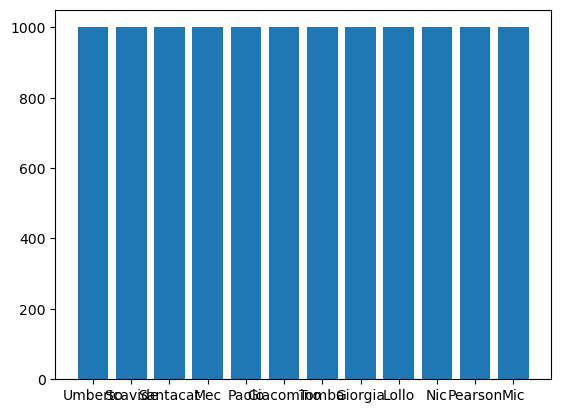

In [9]:
import matplotlib.pyplot as plt

plt.bar(df['name'], df['rating'])